About the Analysis: The primary purpose of this kernel is to practice and enhance my skills in data analysis.

This analysis focuses on the behavior of telecom customers who are more likely to leave the platform. I intend to find out the most striking behavior of customers through EDA and later on use some of the predictive analytics techniques to determine the customers who are most likely to churn.

In [6]:
import pandas as pd

df = pd.read_csv("Telco-Customer-Churn.csv")
df.info()
df.isna().sum()
df

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# -------------------------
# 1️⃣ Convert TotalCharges to numeric
# -------------------------
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# -------------------------
# 2️⃣ Drop irrelevant columns
# -------------------------
df.drop(['customerID'], axis=1, inplace=True)

# -------------------------
# 3️⃣ Encode binary categorical variables
# -------------------------
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No':0, 'Female':1, 'Male':0})

# -------------------------
# 4️⃣ Encode other categorical variables (One-Hot Encoding)
# -------------------------
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

# -------------------------
# 5️⃣ Check class balance
# -------------------------
print(df['Churn'].value_counts(normalize=True))

# -------------------------
# 6️⃣ Confirm cleaned dataset
# -------------------------
print(df.head())
print(df.info())


Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                           

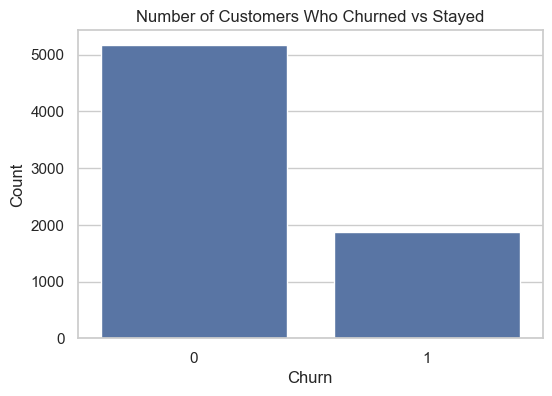

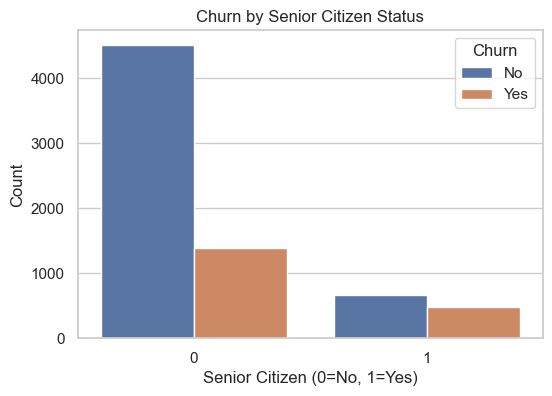

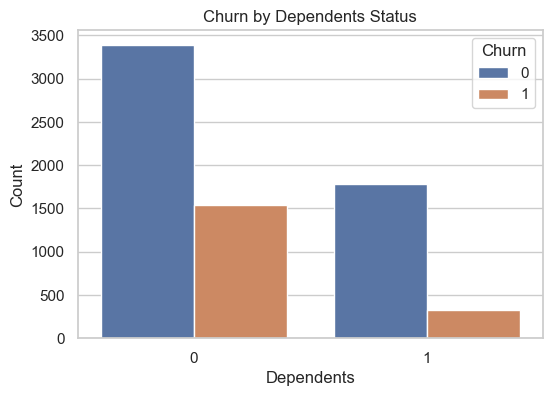

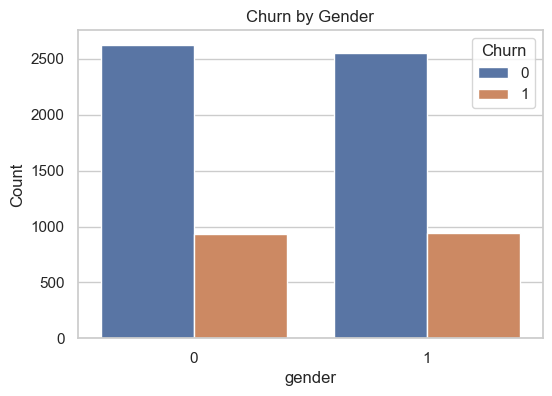

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# -------------------------
# 1️⃣ Churn distribution
# -------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Number of Customers Who Churned vs Stayed")
plt.ylabel("Count")
plt.show()

# -------------------------
# 2️⃣ Churn by SeniorCitizen
# -------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title("Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen (0=No, 1=Yes)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

# -------------------------
# 3️⃣ Churn by Dependents
# -------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title("Churn by Dependents Status")
plt.ylabel("Count")
plt.show()

# -------------------------
# 4️⃣ Churn by Gender
# -------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.ylabel("Count")
plt.show()


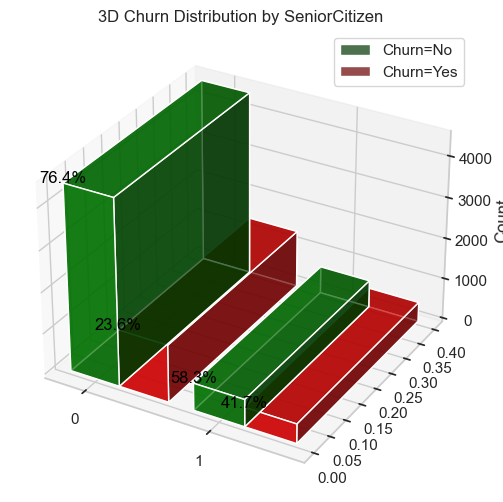

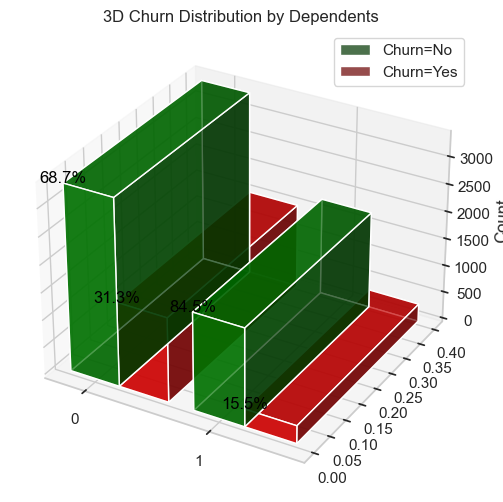

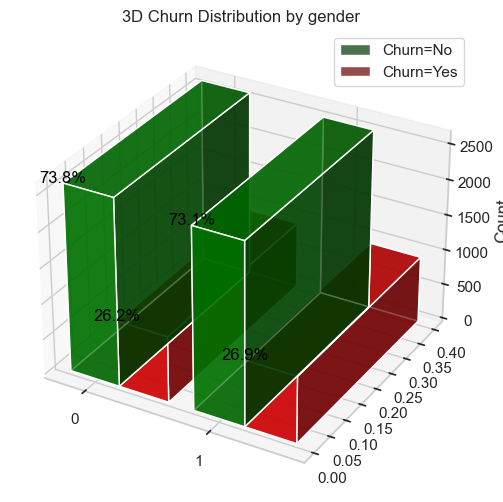

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# Helper function to plot 3D bar chart with percentages
def plot_3d_bar(df, feature):
    counts = df.groupby([feature, 'Churn']).size().unstack(fill_value=0)
    categories = counts.index
    churn_labels = counts.columns

    # Prepare coordinates
    xpos = np.arange(len(categories))
    ypos = np.zeros(len(categories))  # we will offset bars for Churn 0/1
    zpos = np.zeros(len(categories))

    dx = 0.4
    dy = 0.4
    dz0 = counts[0].values
    dz1 = counts[1].values

    # Percentages
    total = dz0 + dz1
    pct0 = dz0 / total * 100
    pct1 = dz1 / total * 100

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')

    # Bars for Churn = 0
    ax.bar3d(xpos - dx/2, ypos, zpos, dx, dy, dz0, color='green', alpha=0.7, label='Churn=No')
    # Bars for Churn = 1
    ax.bar3d(xpos + dx/2, ypos, zpos, dx, dy, dz1, color='red', alpha=0.7, label='Churn=Yes')

    # Add percentages on top
    for i, (x, d0, d1, p0, p1) in enumerate(zip(xpos, dz0, dz1, pct0, pct1)):
        ax.text(x - dx/2, 0, d0 + 5, f"{p0:.1f}%", color='black', ha='center')
        ax.text(x + dx/2, 0, d1 + 5, f"{p1:.1f}%", color='black', ha='center')

    ax.set_xticks(xpos)
    ax.set_xticklabels(categories)
    ax.set_ylabel('')
    ax.set_zlabel('Count')
    ax.set_title(f'3D Churn Distribution by {feature}')
    ax.legend()
    plt.show()

# -------------------------
# Plot 3D bar charts
# -------------------------
plot_3d_bar(df, 'SeniorCitizen')
plot_3d_bar(df, 'Dependents')
plot_3d_bar(df, 'gender')
